In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#Loading the required datasets

totalcase = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv', 
                        index_col='date', parse_dates=True)
casebystate = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv', 
                        index_col='date', parse_dates=True)
totaltest = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_malaysia.csv', 
                        index_col='date', parse_dates=True)
testbystate = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_state.csv', 
                        index_col='date', parse_dates=True)
totaldeath = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_malaysia.csv', 
                        index_col='date', parse_dates=True)
deathbystate = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv', 
                        index_col='date', parse_dates=True)
hospital = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/hospital.csv', 
                        index_col='date', parse_dates=True)
pkrc = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/pkrc.csv', 
                        index_col='date', parse_dates=True)
vax = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/vax_malaysia.csv', 
                        index_col='date', parse_dates=True)
population = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/static/population.csv')

Text(0, 0.5, 'Number of cases')

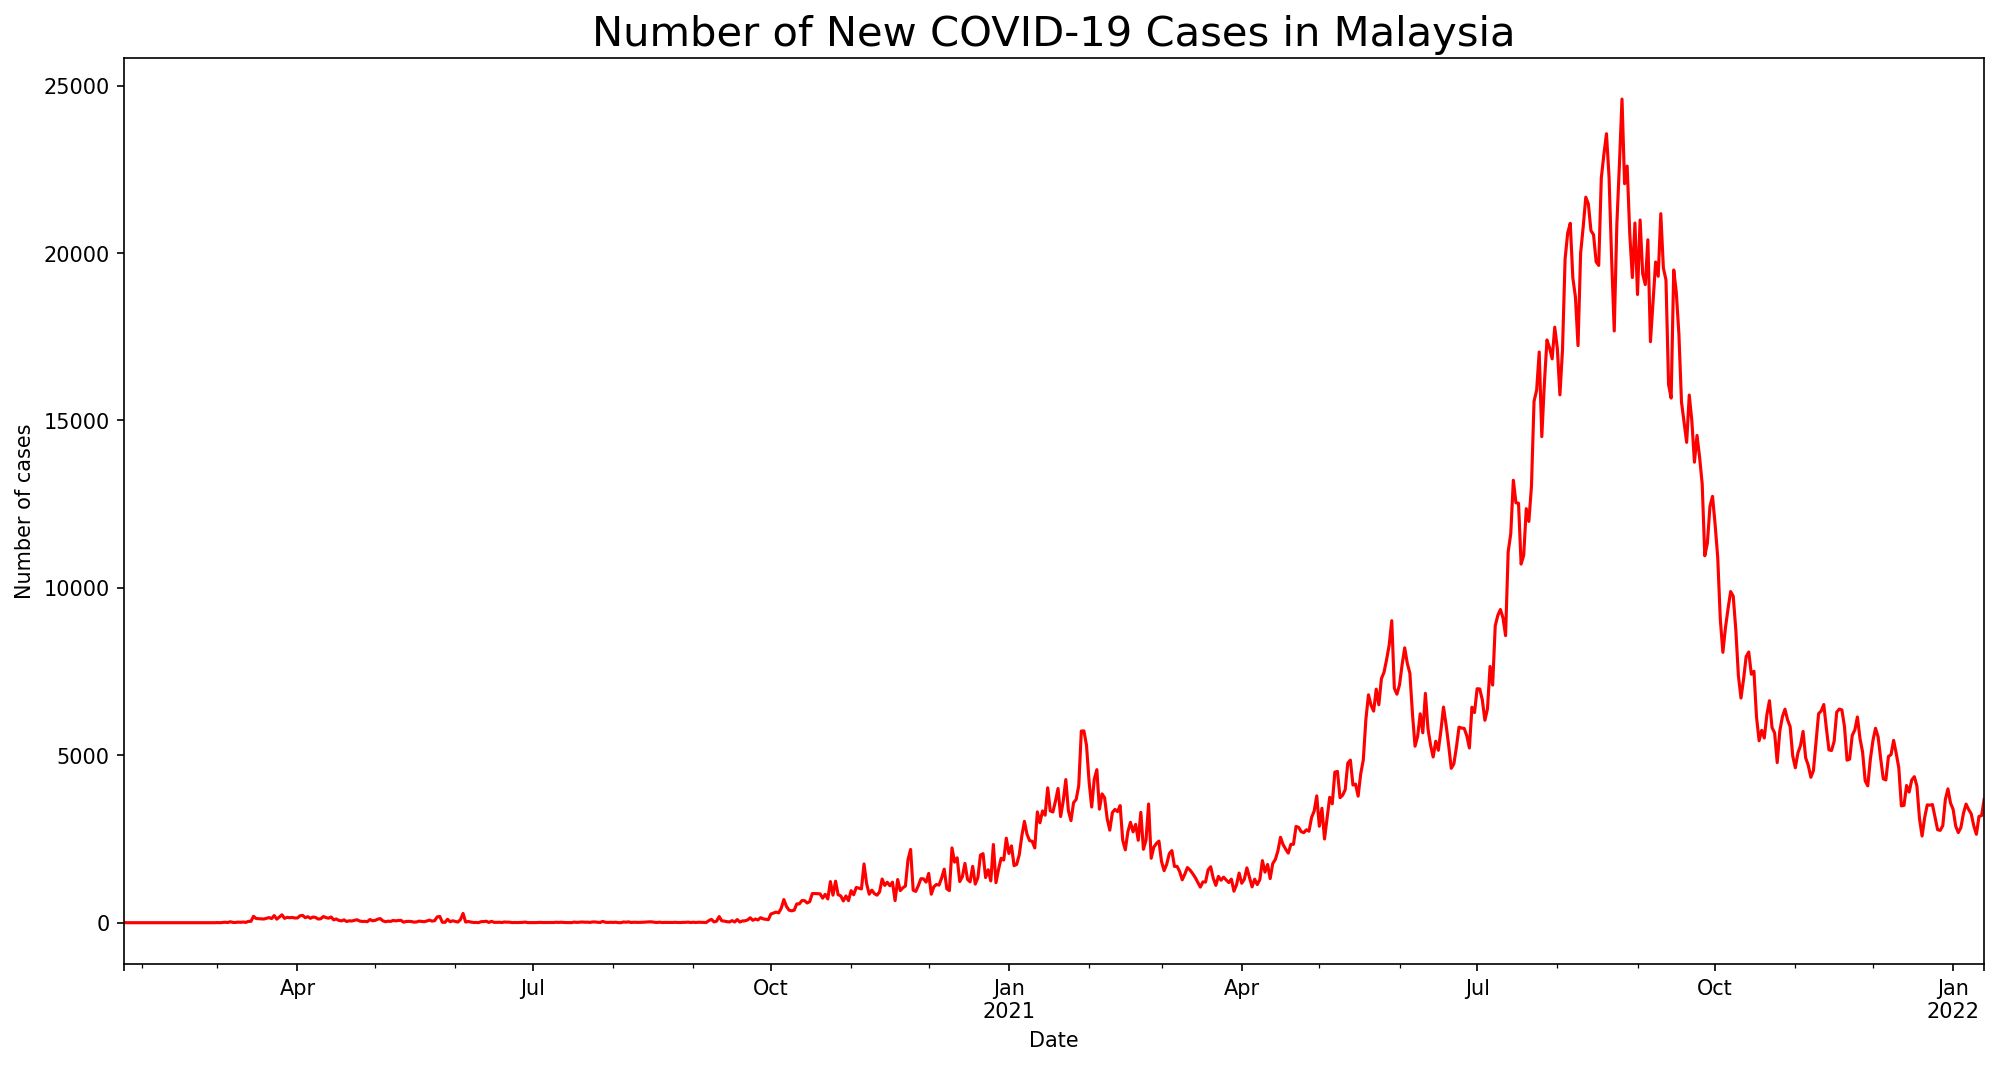

In [3]:
plt.figure(figsize=(16, 8), dpi=150)
totalcase['cases_new'].plot (label='Total case', color='red')
plt.title('Number of New COVID-19 Cases in Malaysia', size = '20')
plt.xlabel('Date')
plt.ylabel('Number of cases')


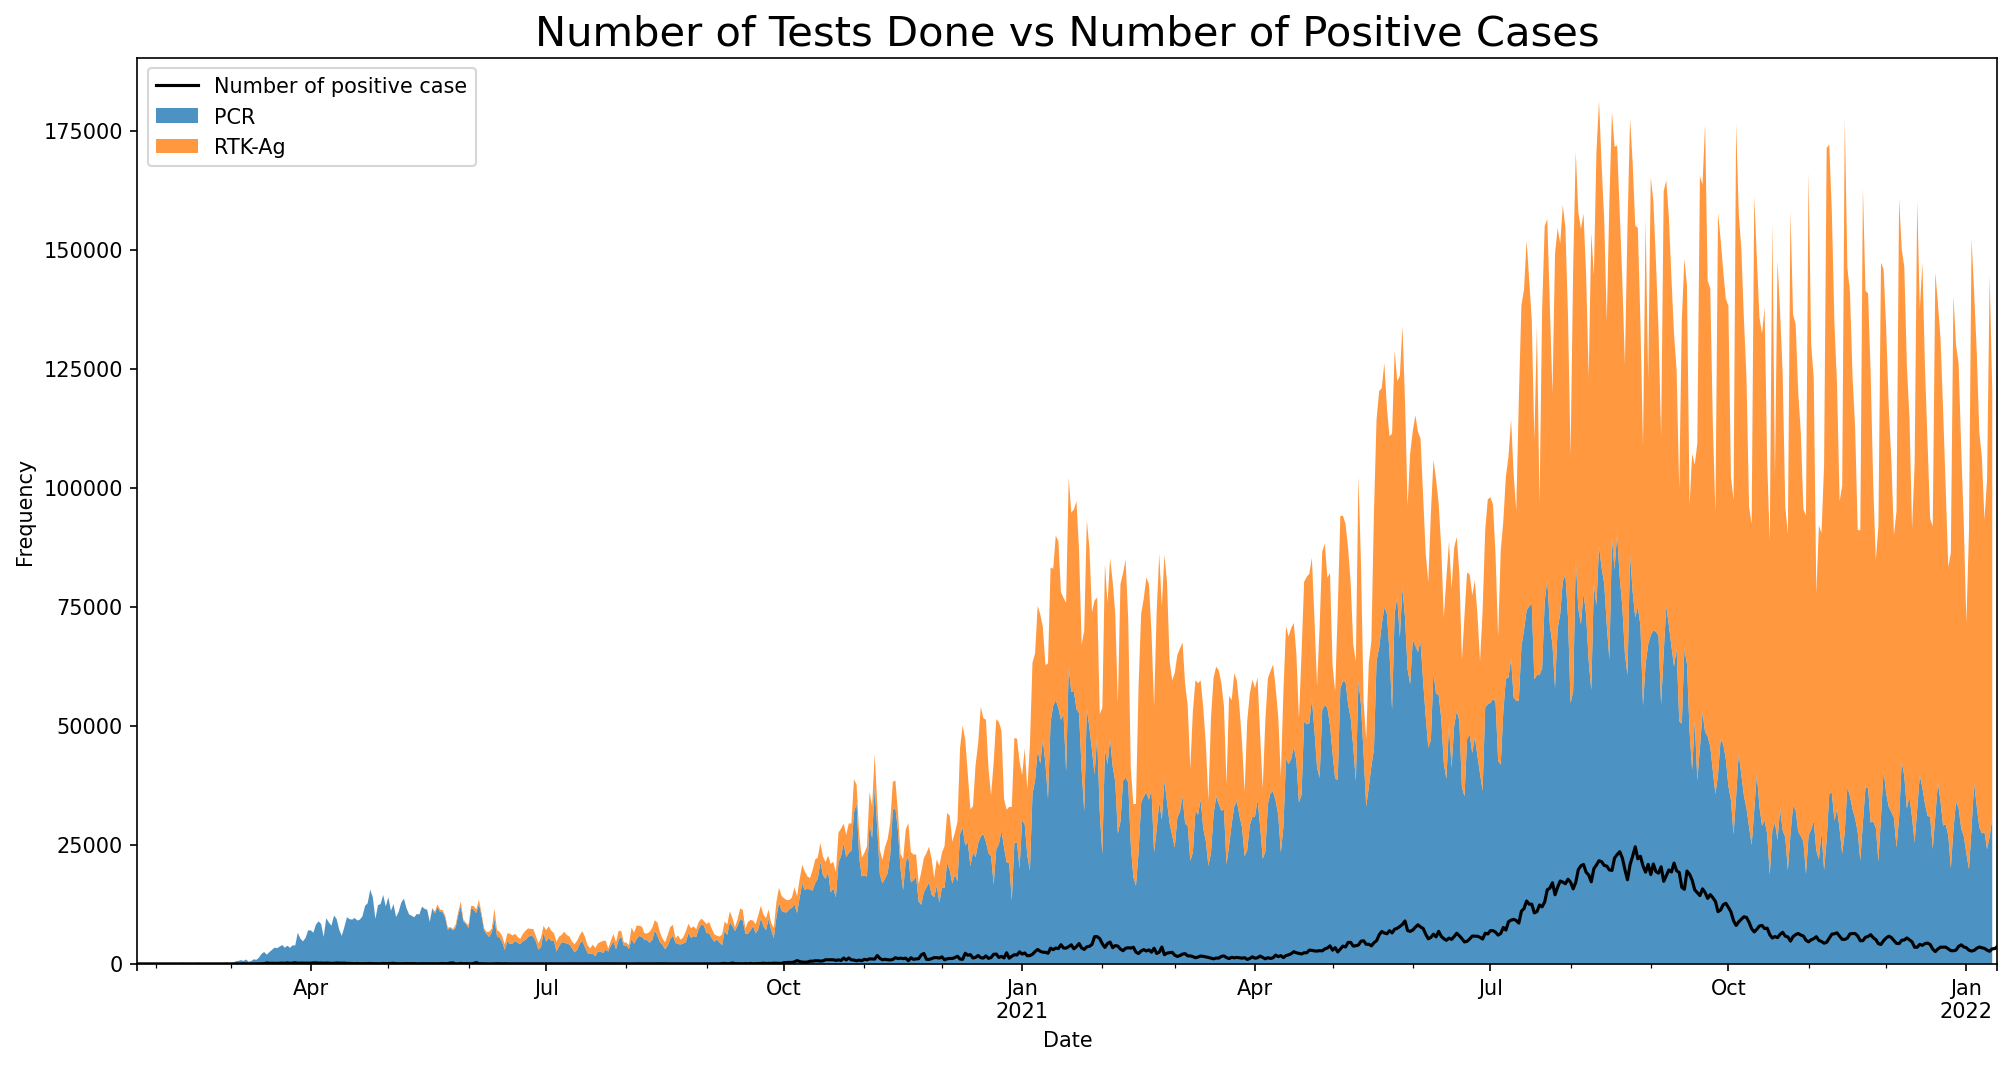

In [4]:
# Number of new cases vs number of tests done
plt.figure(figsize=(16, 8), dpi=150)
plt.stackplot(totaltest.index,
              [totaltest['pcr'], totaltest['rtk-ag']],
              labels= ['PCR', 'RTK-Ag'],
              alpha=0.8)
totalcase['cases_new'].plot (label='Number of positive case', color = 'black')
plt.title('Number of Tests Done vs Number of Positive Cases', size = '20')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(loc=2)


Text(0.5, 1.0, 'Percentage of Population Vaccinated')

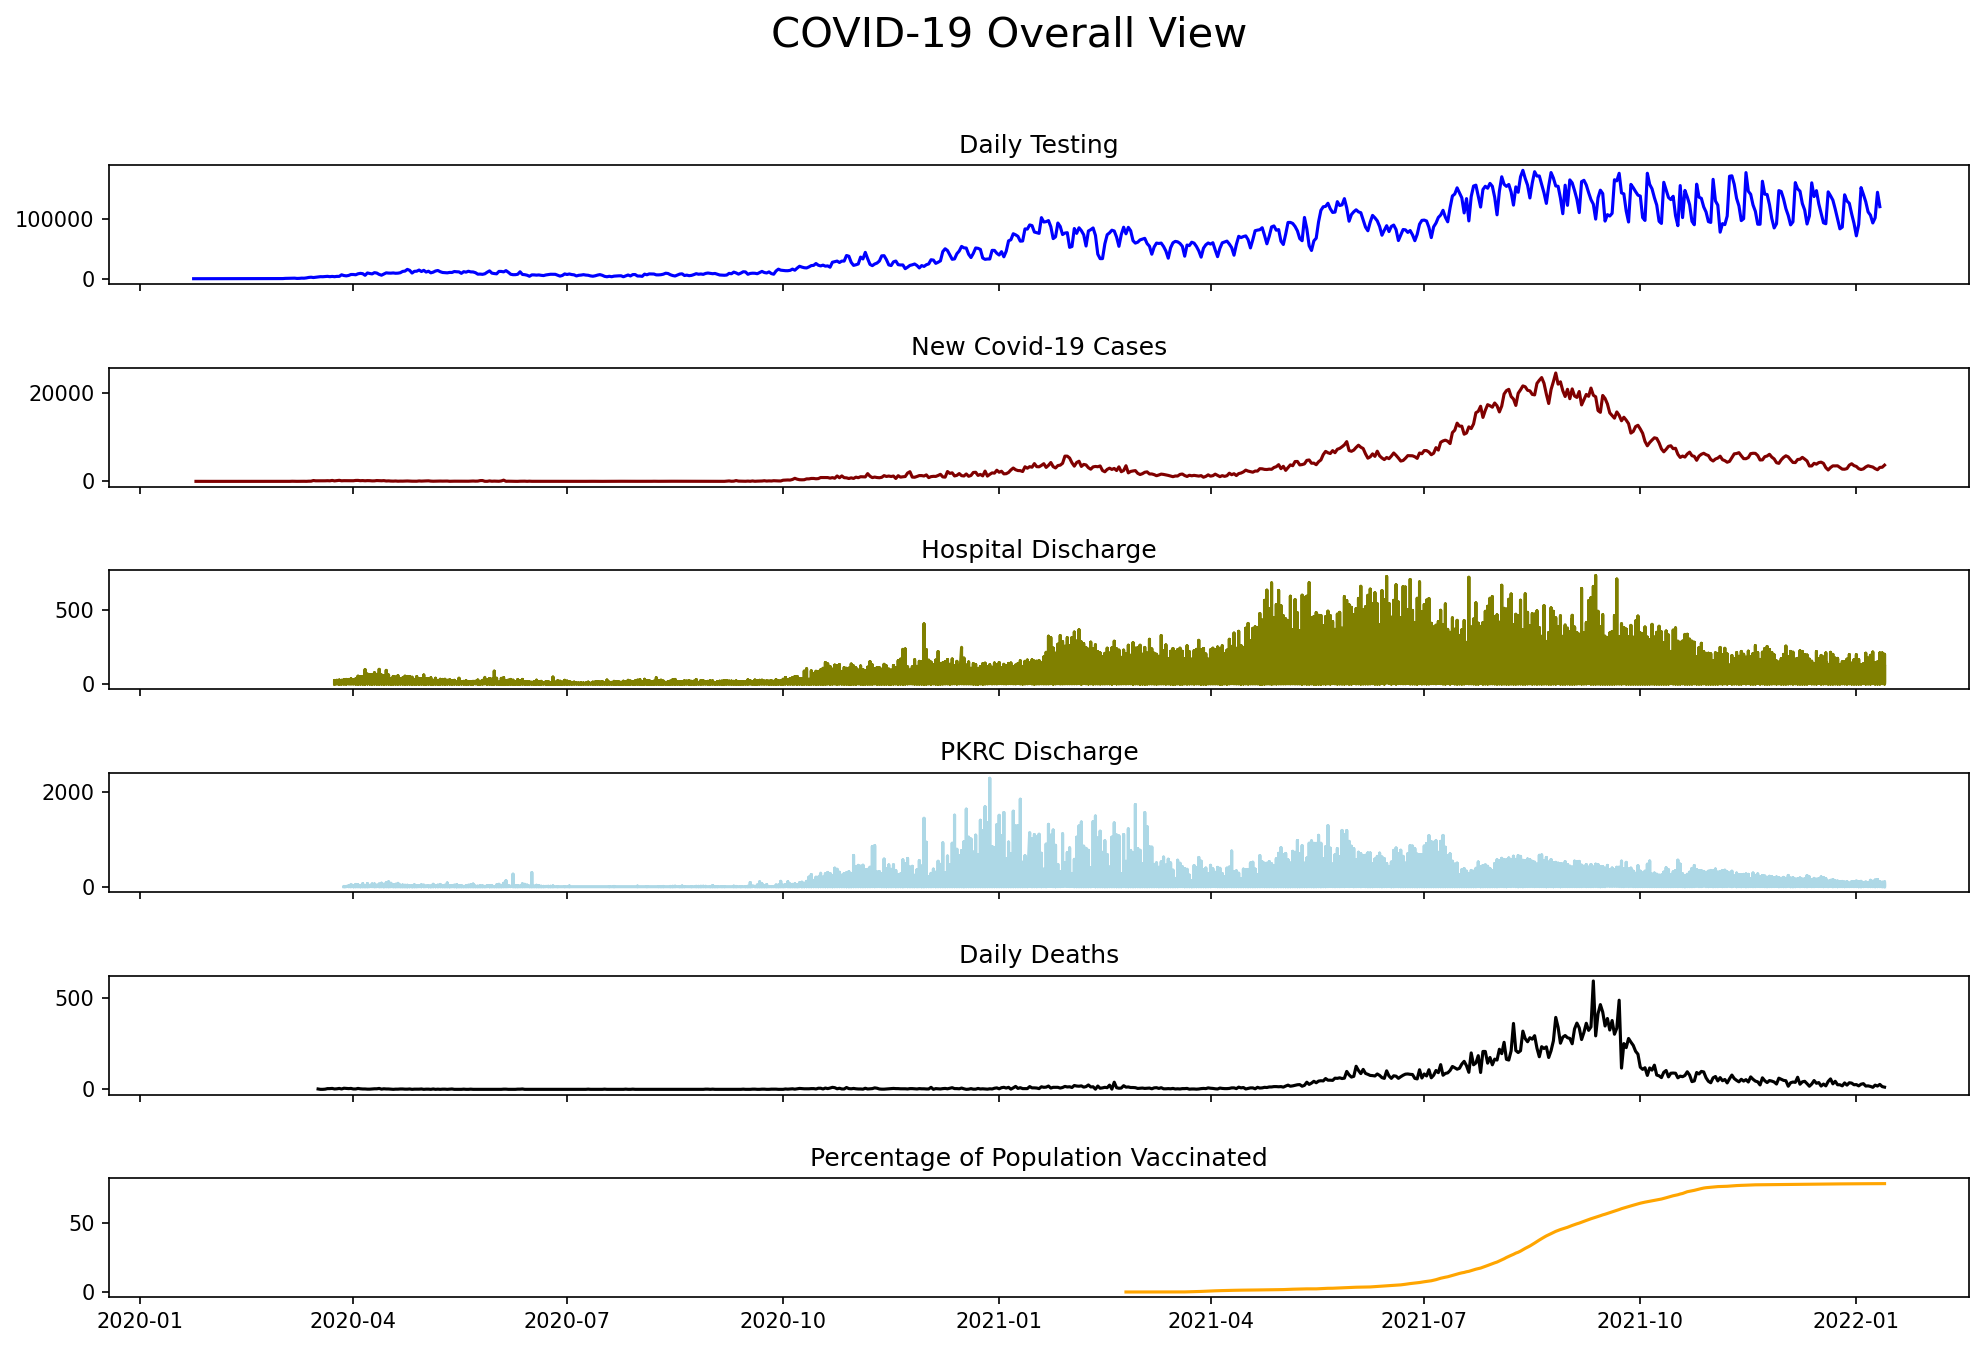

In [5]:
# Overview of COVID situation in Malaysia

totaltest ['dailytest'] = totaltest ['pcr'] + totaltest ['rtk-ag']
vaccinatedpercentage = vax['cumul_full']/ 32657400 * 100 #32657400 is the Malaysian population, figure taken from the population dataset


fig = plt.figure(figsize=(16, 10), dpi=150)
gs = fig.add_gridspec(6, hspace=0.7)
axs = gs.subplots(sharex=True)
fig.suptitle('COVID-19 Overall View', fontsize=20)

axs[0].plot(totaltest['dailytest'], color = 'blue')
axs[0].set_title("Daily Testing")

axs[1].plot(totalcase['cases_new'], color = 'maroon')
axs[1].set_title("New Covid-19 Cases")

axs[2].plot(hospital['discharged_total'], color = 'olive')
axs[2].set_title("Hospital Discharge")

axs[3].plot(pkrc['discharged_total'], color = 'lightblue')
axs[3].set_title("PKRC Discharge")

axs[4].plot(totaldeath['deaths_new'], color = 'black')
axs[4].set_title("Daily Deaths")

axs[5].plot(vaccinatedpercentage, color = 'orange')
axs[5].set_title("Percentage of Population Vaccinated")

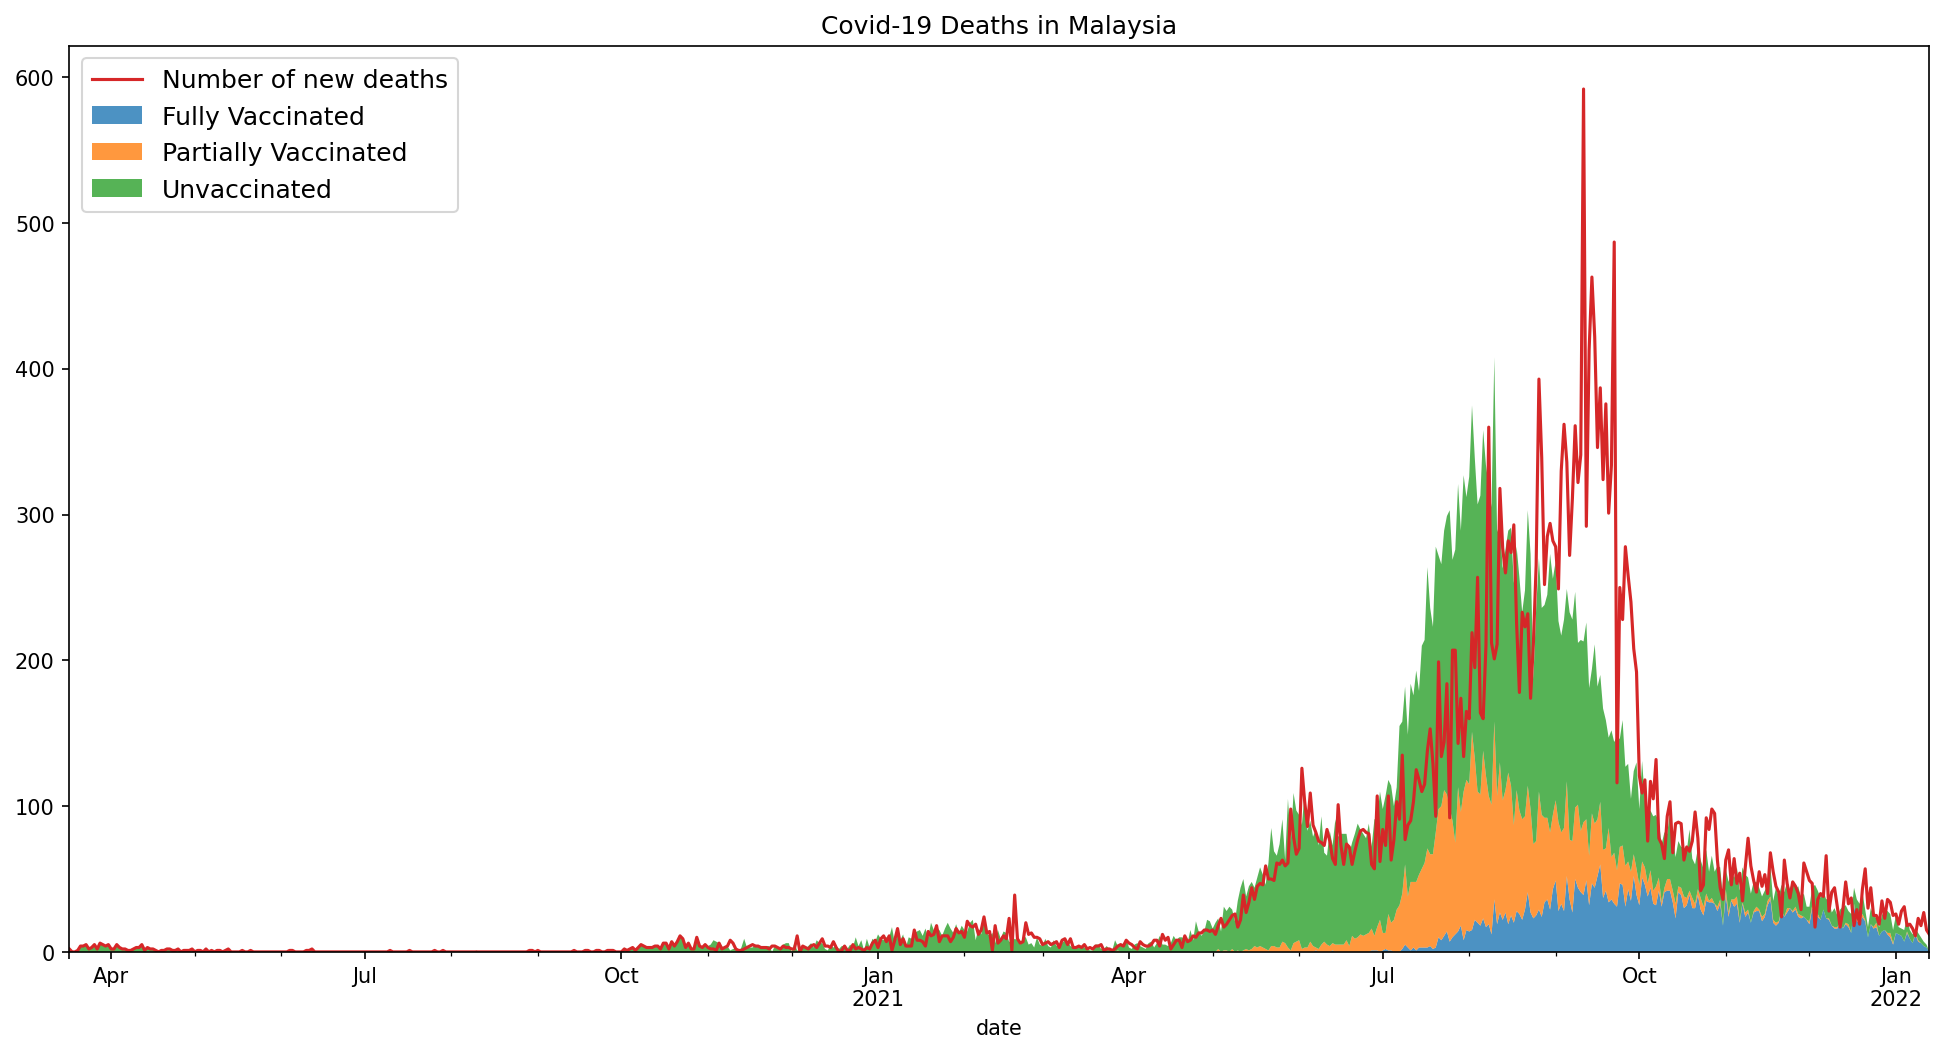

In [6]:
# Overview of number of deaths due to Covid-19 in Malaysia
plt.figure(figsize=(16, 8), dpi=150)
plt.stackplot(totaldeath.index,
              [totaldeath['deaths_fvax'], totaldeath['deaths_pvax'],
               totaldeath['deaths_unvax']],
              labels=['Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated'],
              alpha=0.8)
totaldeath['deaths_new'].plot (label = "Number of new deaths")

plt.title ('Covid-19 Deaths in Malaysia')
plt.legend(loc=2, fontsize='large')
plt.show()

# Discrepancy in the graph is probably due to backlog of death announcement. 
# The data for the red line was done based on date of announcement of death.
# Categorisation on vaccination status was corrected to the actual day of death.

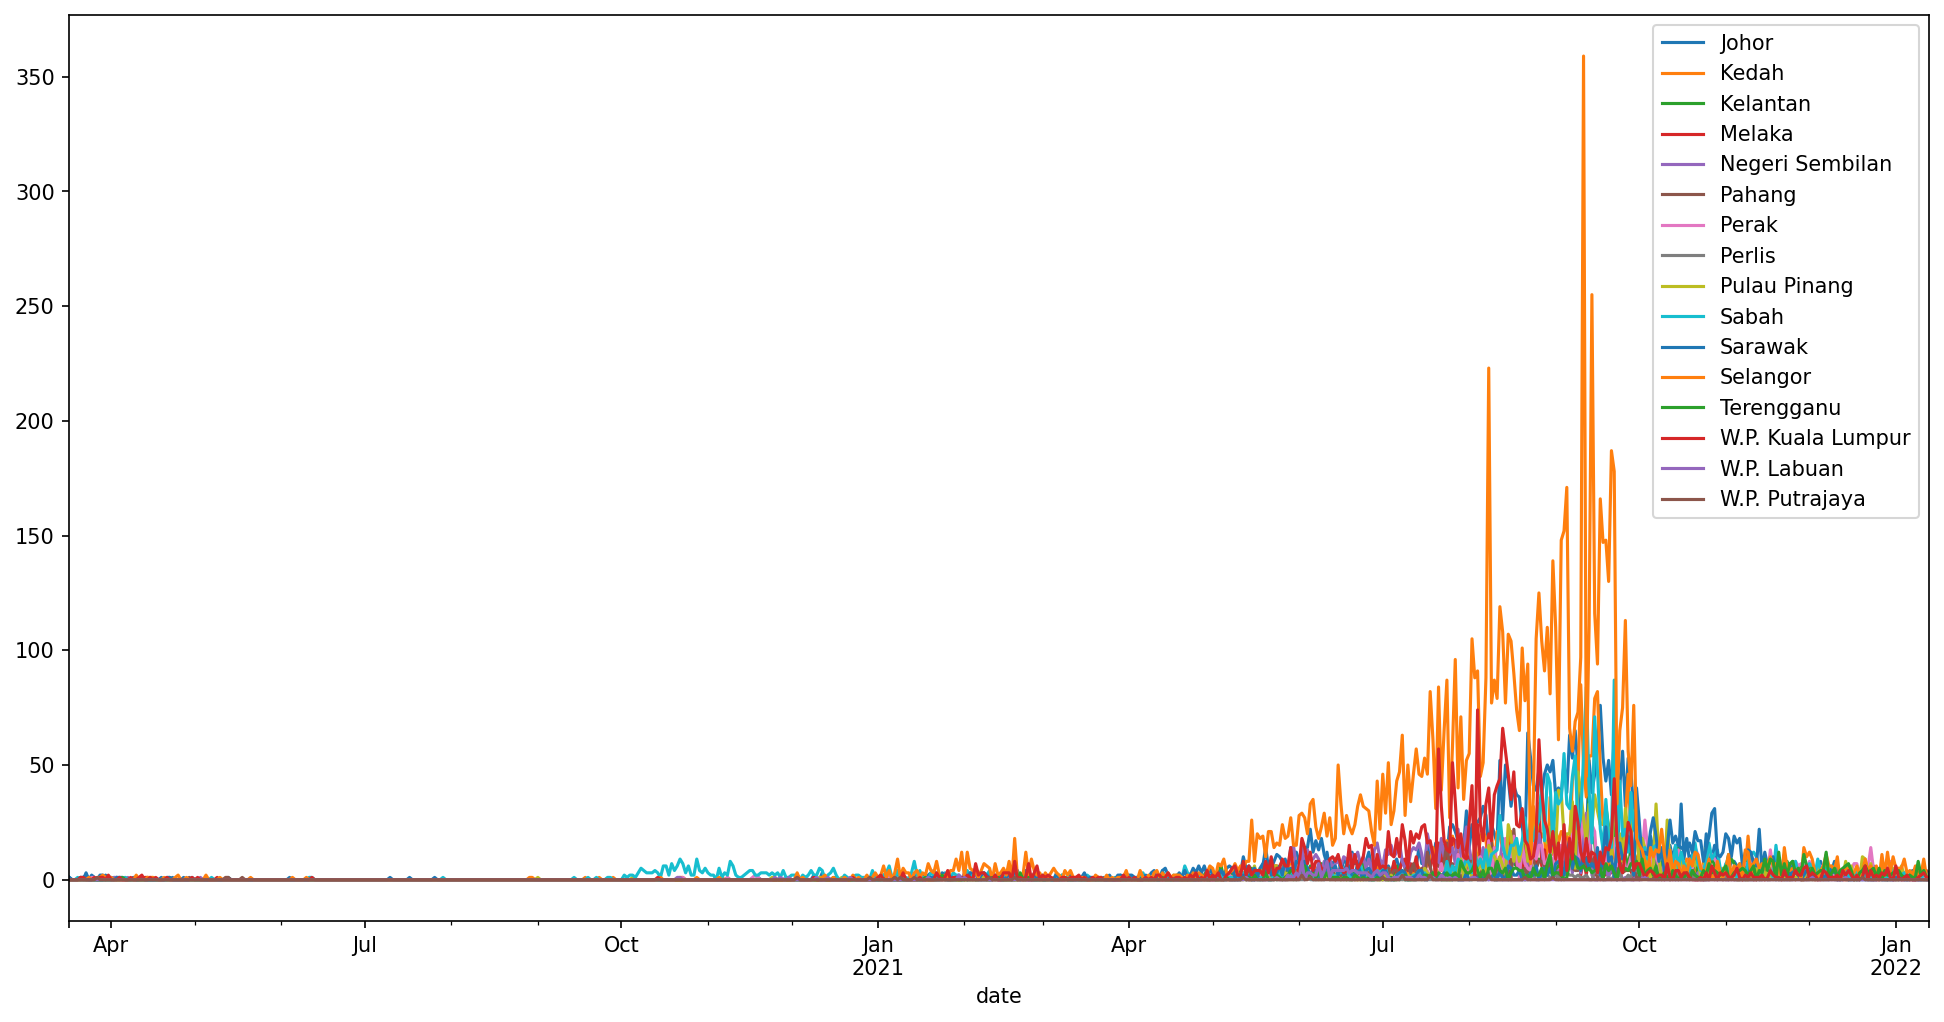

In [7]:
# Deaths according to state
plt.figure(figsize=(16, 8), dpi=150)
deathbystate.groupby('state')['deaths_new'].plot(legend='True')
plt.show()


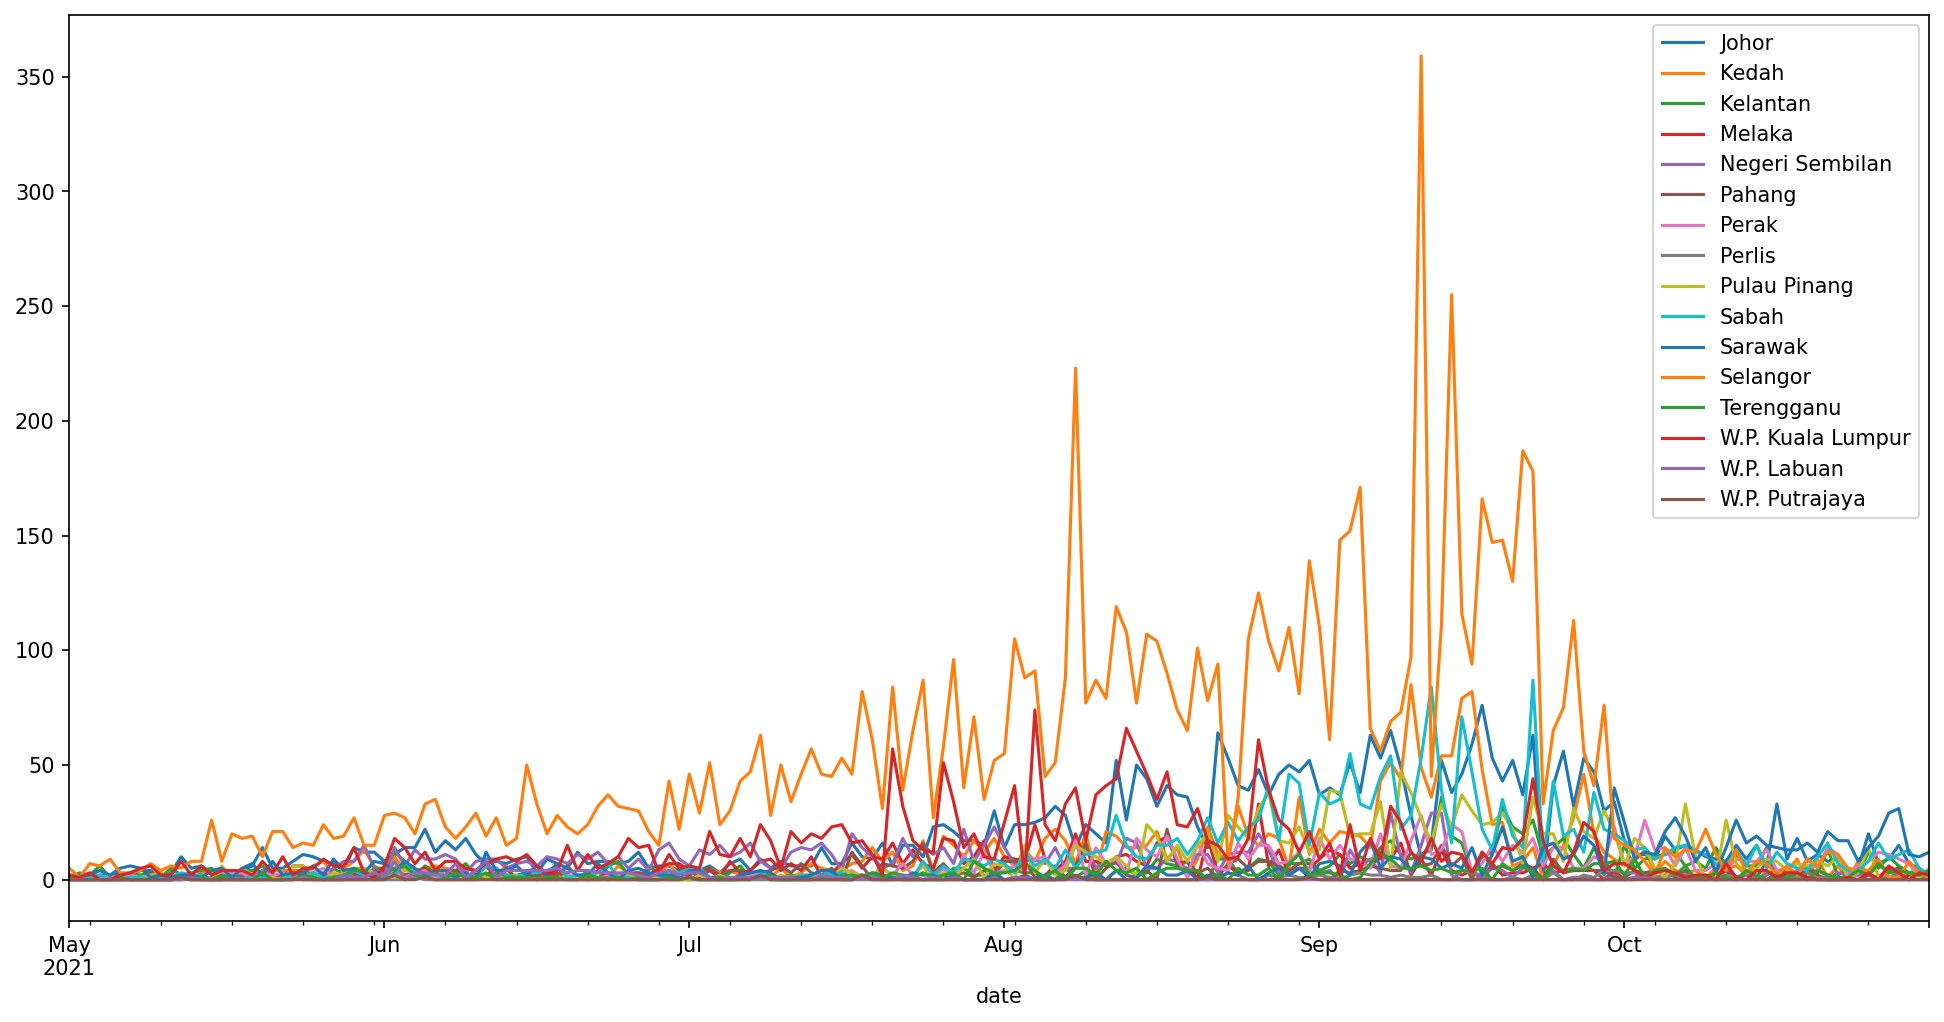

In [8]:
# Deaths according to state but focusing during the time frame where it peaked
plt.figure(figsize=(16, 8), dpi=150)
deathwave = deathbystate['2021-05-01' : '2021-10-31']
deathwave.groupby('state')['deaths_new'].plot(legend='True')
plt.show()

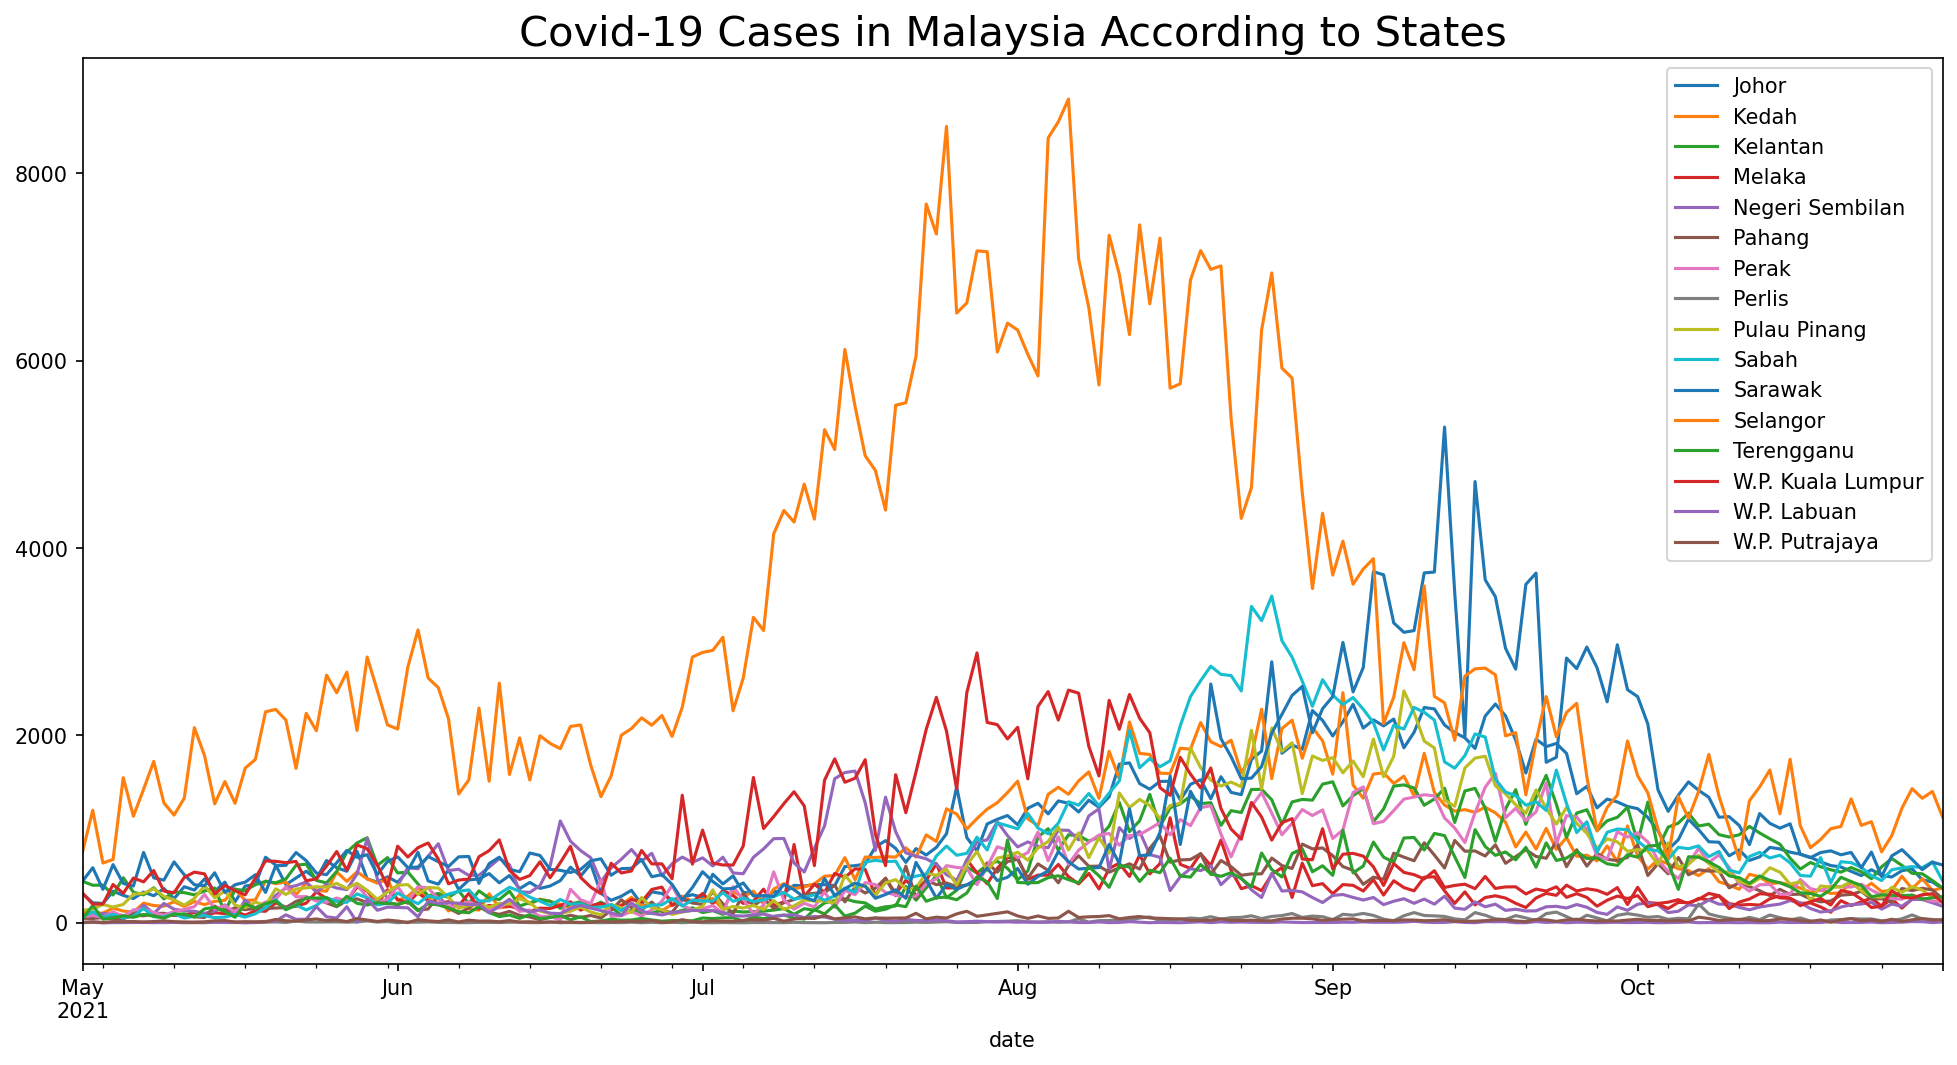

In [57]:
# Number of cases according to state but focusing during the time frame where it peaked

plt.figure(figsize=(16, 8), dpi=150)
casewave = casebystate['2021-05-01' : '2021-10-31']
casewave.groupby('state')['cases_new'].plot(legend='True')
plt.title ("Covid-19 Cases in Malaysia According to States", size = 20)
plt.show()

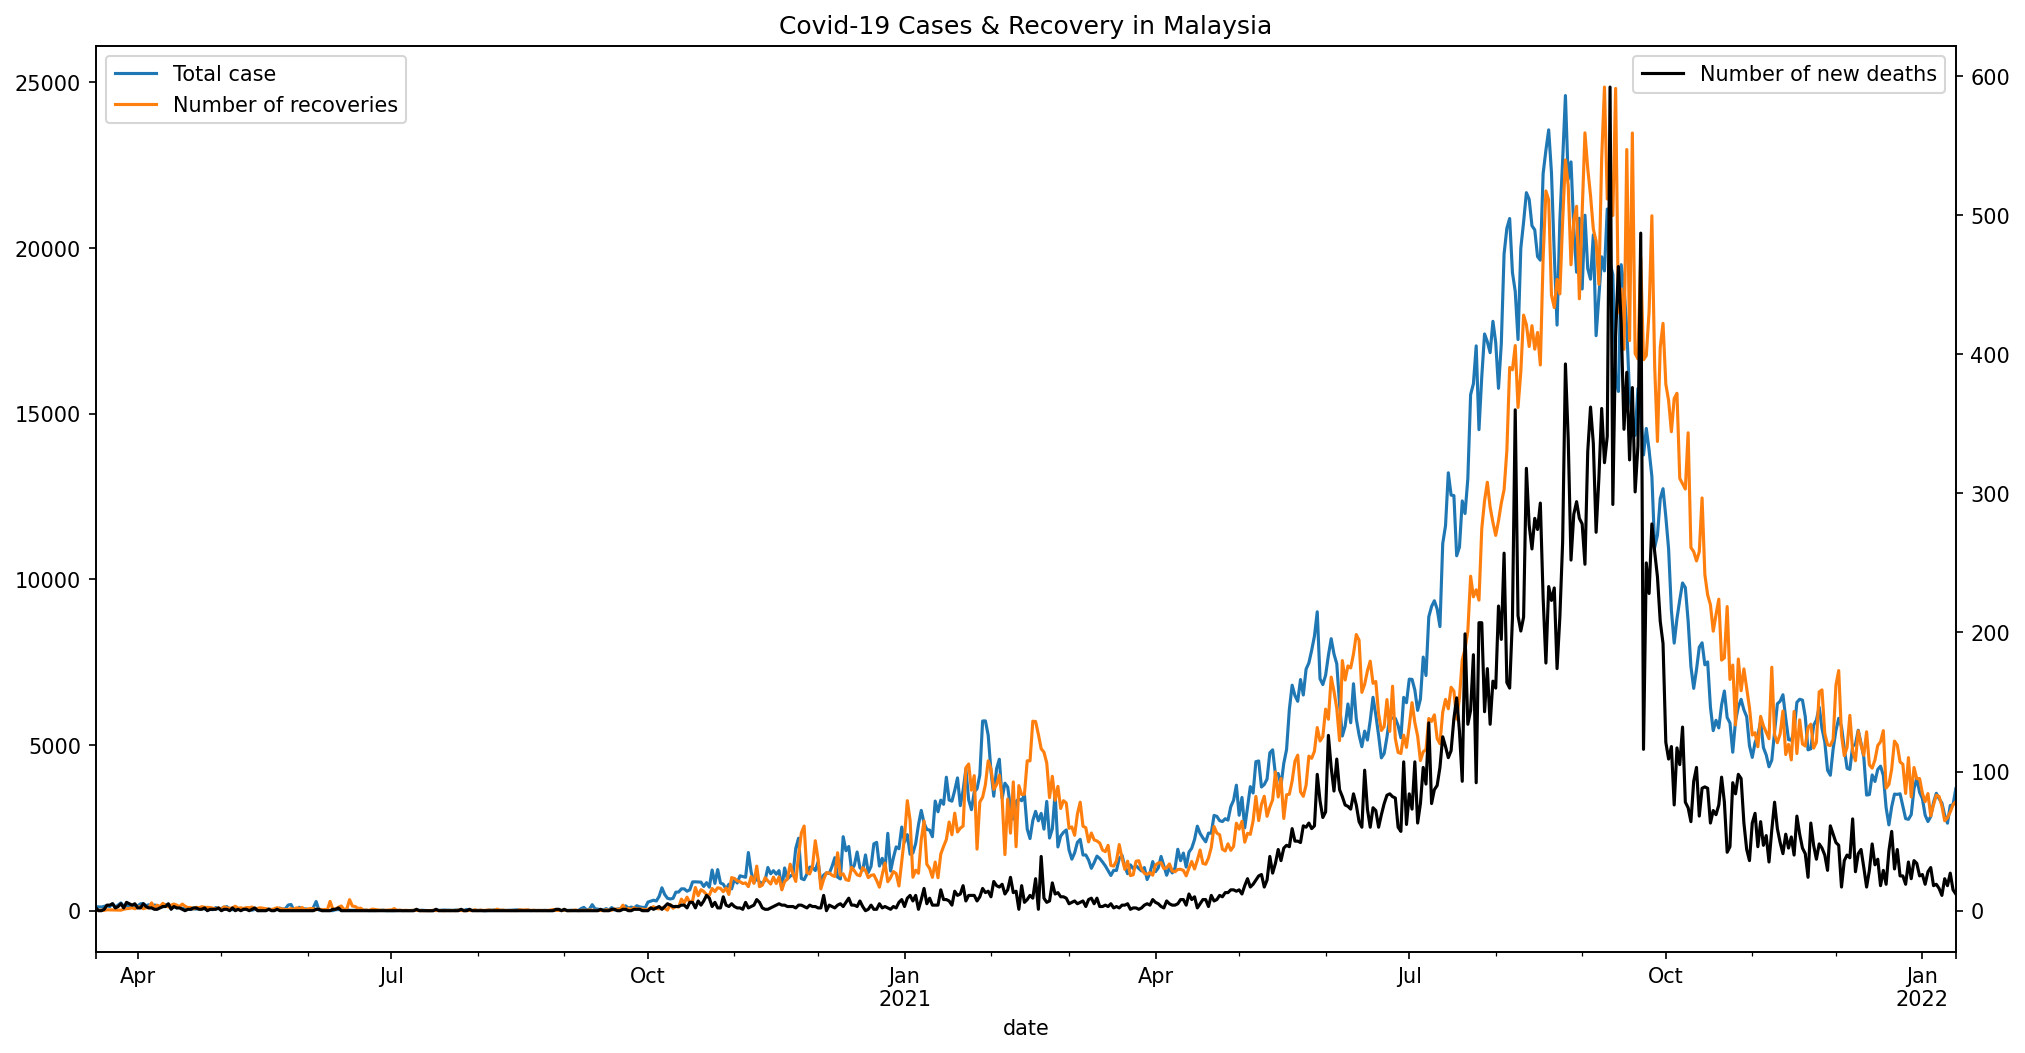

In [50]:
# Were there excessive deaths? 
fig, ax = plt.subplots(figsize=(16, 8), dpi=150)
totalcase['cases_new'].plot (label='Total case')
totalcase ['cases_recovered'].plot (label = "Number of recoveries")
plt.legend(loc=2)

ax = ax.twinx()
totaldeath['deaths_new'].plot (label = "Number of new deaths", color = 'black', legend = True)

plt.title ('Covid-19 Cases & Recovery in Malaysia')
plt.show()


Text(0.5, 1.0, 'Percentage of Population Vaccinated')

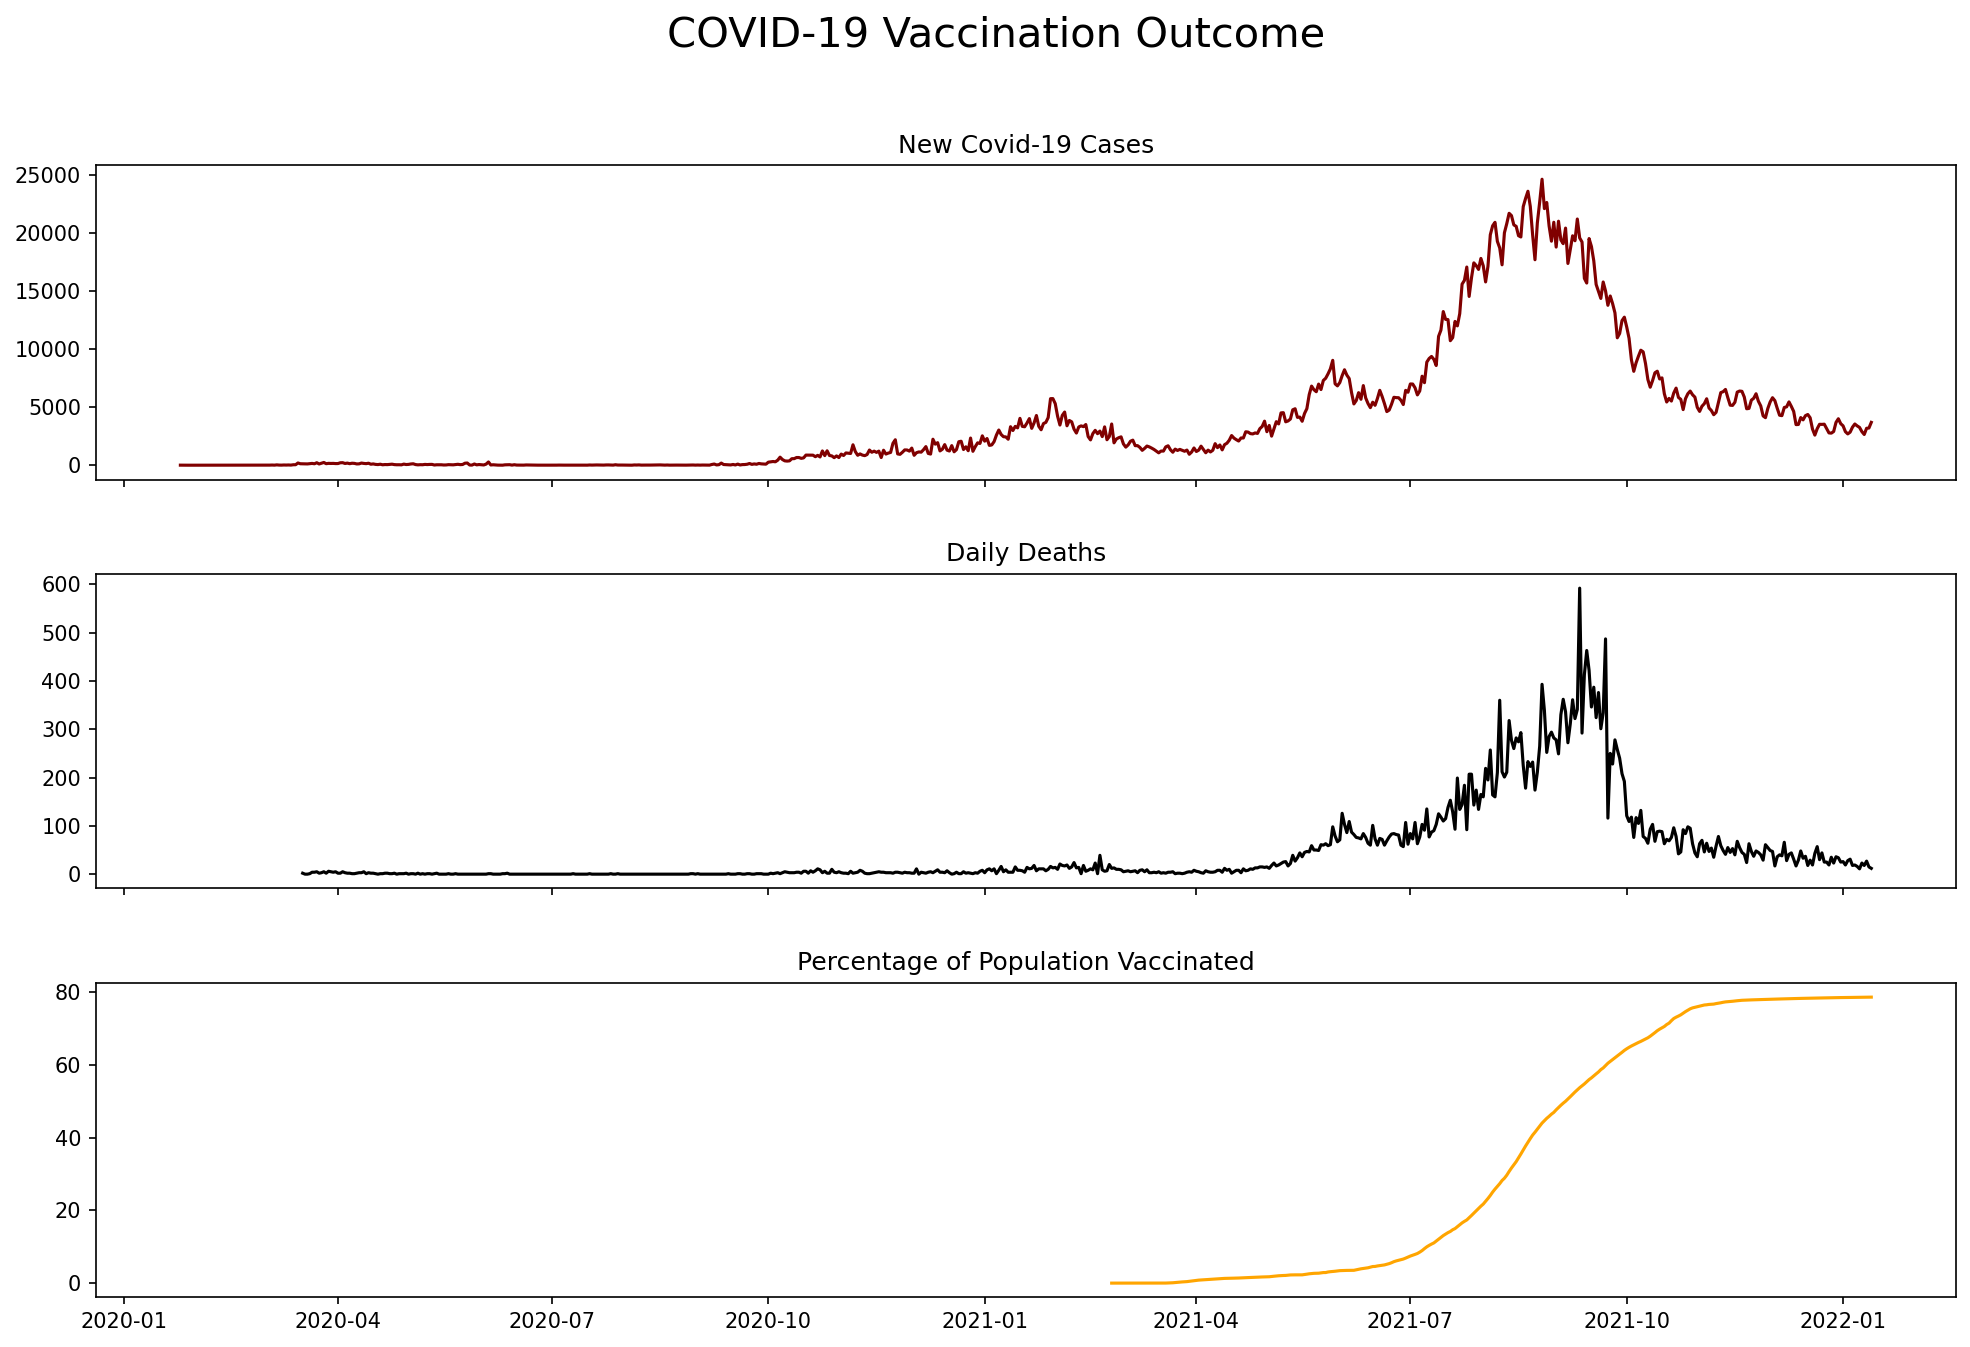

In [55]:
fig = plt.figure(figsize=(16, 10), dpi=150)
gs = fig.add_gridspec(3, hspace=0.3)
axs = gs.subplots(sharex=True)
fig.suptitle('COVID-19 Vaccination Outcome', fontsize=20)

axs[0].plot(totalcase['cases_new'], color = 'maroon')
axs[0].set_title("New Covid-19 Cases")

axs[1].plot(totaldeath['deaths_new'], color = 'black')
axs[1].set_title("Daily Deaths")

axs[2].plot(vaccinatedpercentage, color = 'orange')
axs[2].set_title("Percentage of Population Vaccinated")

In [11]:
msiacase = totalcase ['cases_new'].sum()
msiacase

2798917

In [12]:
msiadeath = totaldeath ['deaths_new'].sum()
msiadeath

31750

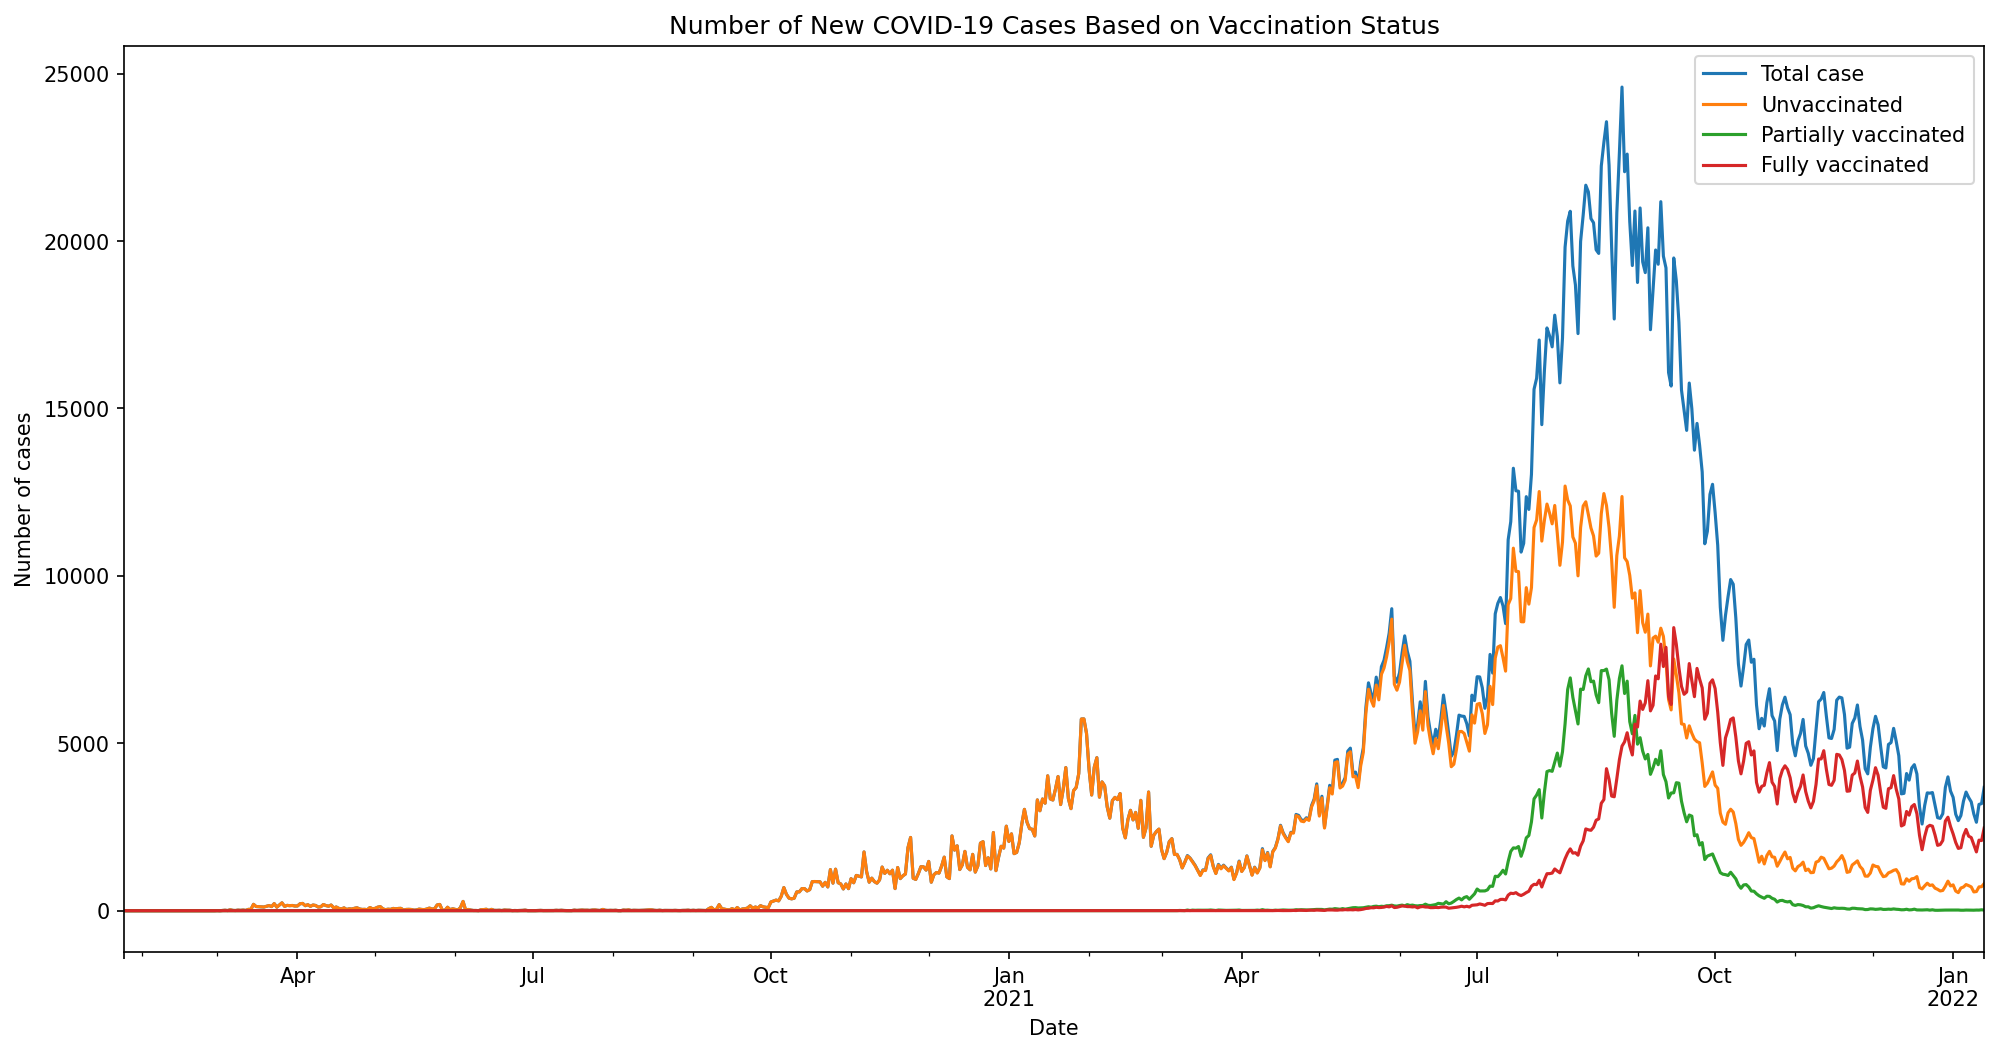

In [13]:
# Cases based on vaccination status
plt.subplots (figsize=(16, 8), dpi=150)
totalcase['cases_new'].plot(label='Total case')
totalcase['cases_unvax'].plot(label='Unvaccinated')
totalcase['cases_pvax'].plot(label='Partially vaccinated')
totalcase['cases_fvax'].plot(label='Fully vaccinated')
  
plt.title('Number of New COVID-19 Cases Based on Vaccination Status')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend()

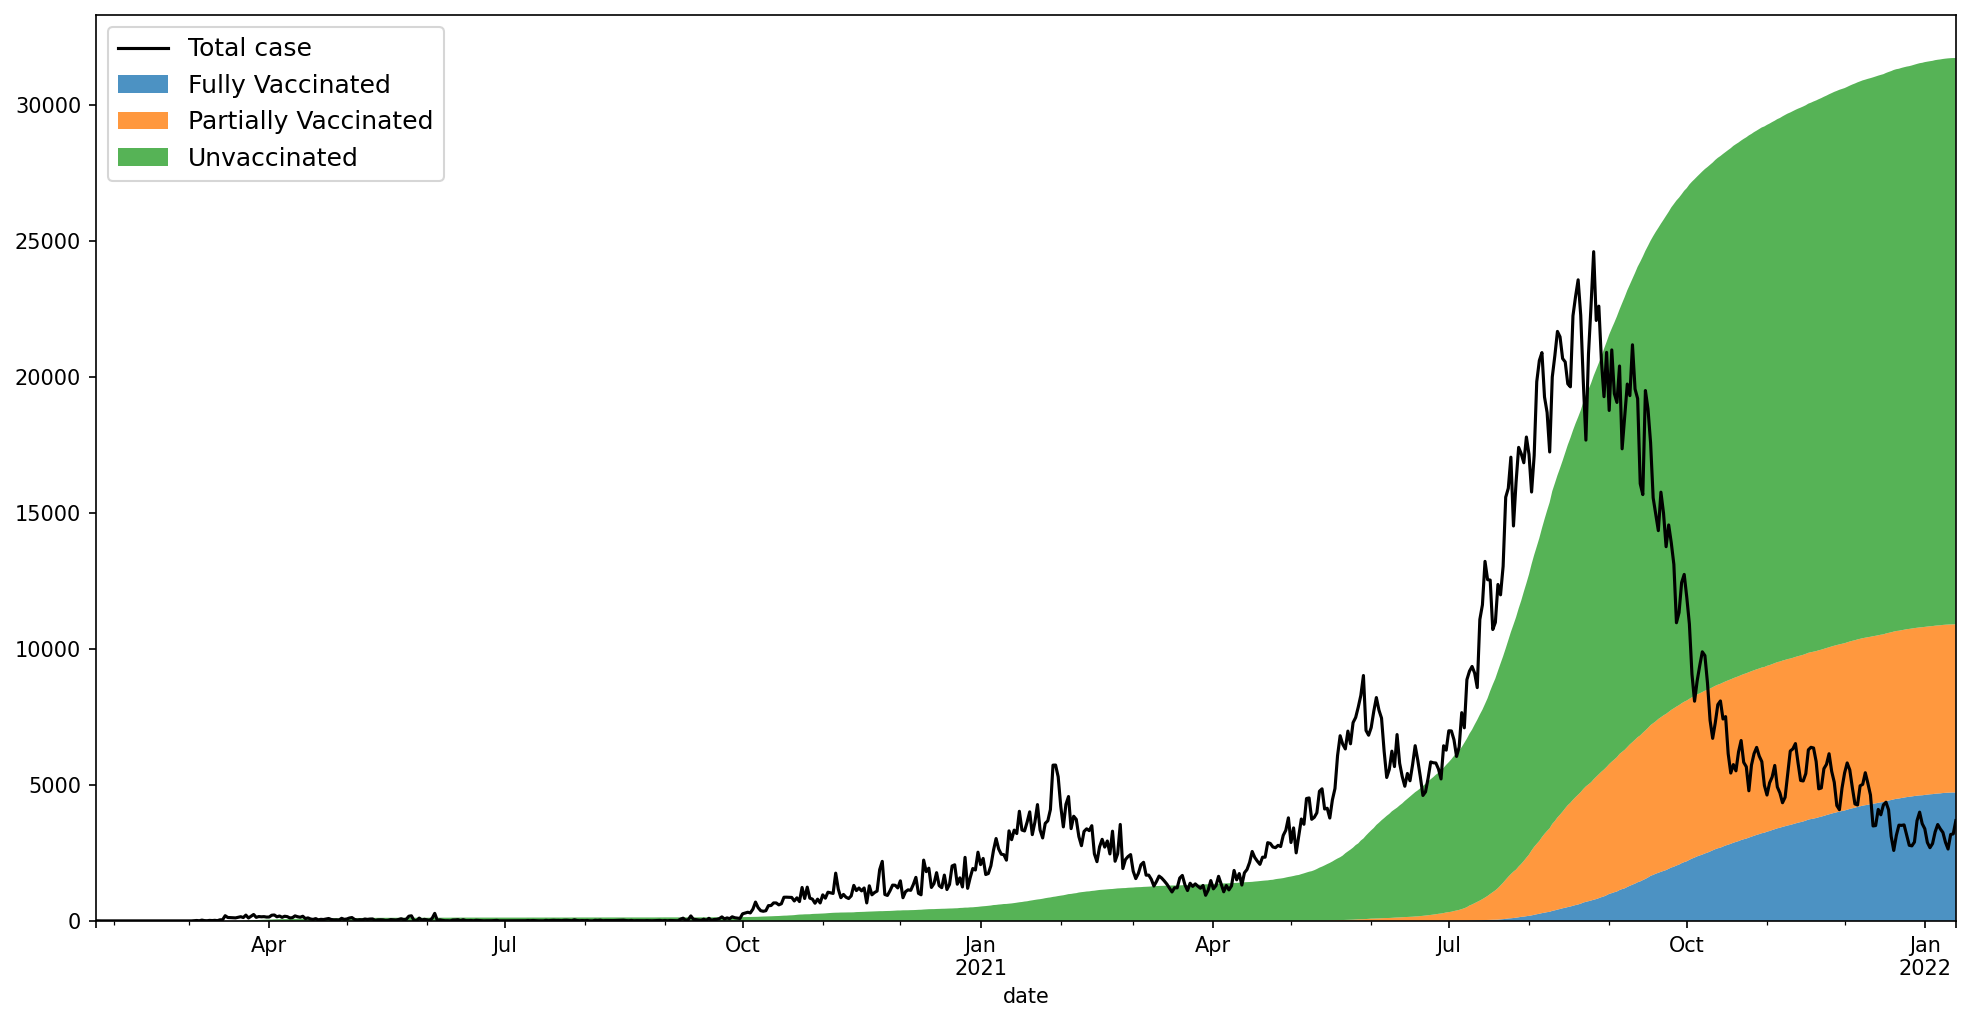

In [14]:
#Finding the proportion of vaccinated people vs unvaccinated people who have died due to Covid

cumsumtot = np.cumsum(totaldeath['deaths_new'])
cumsumfvax = np.cumsum(totaldeath['deaths_fvax'])
cumsumpvax = np.cumsum(totaldeath['deaths_pvax'])
cumsumunvax = np.cumsum(totaldeath['deaths_unvax'])

totaldeath['cumsumtot'] = np.cumsum(totaldeath['deaths_new'])
totaldeath ['cumsumfvax'] = np.cumsum(totaldeath['deaths_fvax'])
totaldeath ['cumsumpvax'] = np.cumsum(totaldeath['deaths_pvax'])
totaldeath ['cumsumunvax'] = np.cumsum(totaldeath['deaths_unvax'])

plt.figure(figsize=(16, 8), dpi=150)
totalcase['cases_new'].plot(label='Total case', color='black')
plt.stackplot(totaldeath.index,
              [totaldeath['cumsumfvax'], totaldeath['cumsumpvax'],
               totaldeath['cumsumunvax']],
              labels=['Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated'],
              alpha=0.8)
plt.legend(loc=2, fontsize='large')
plt.show()

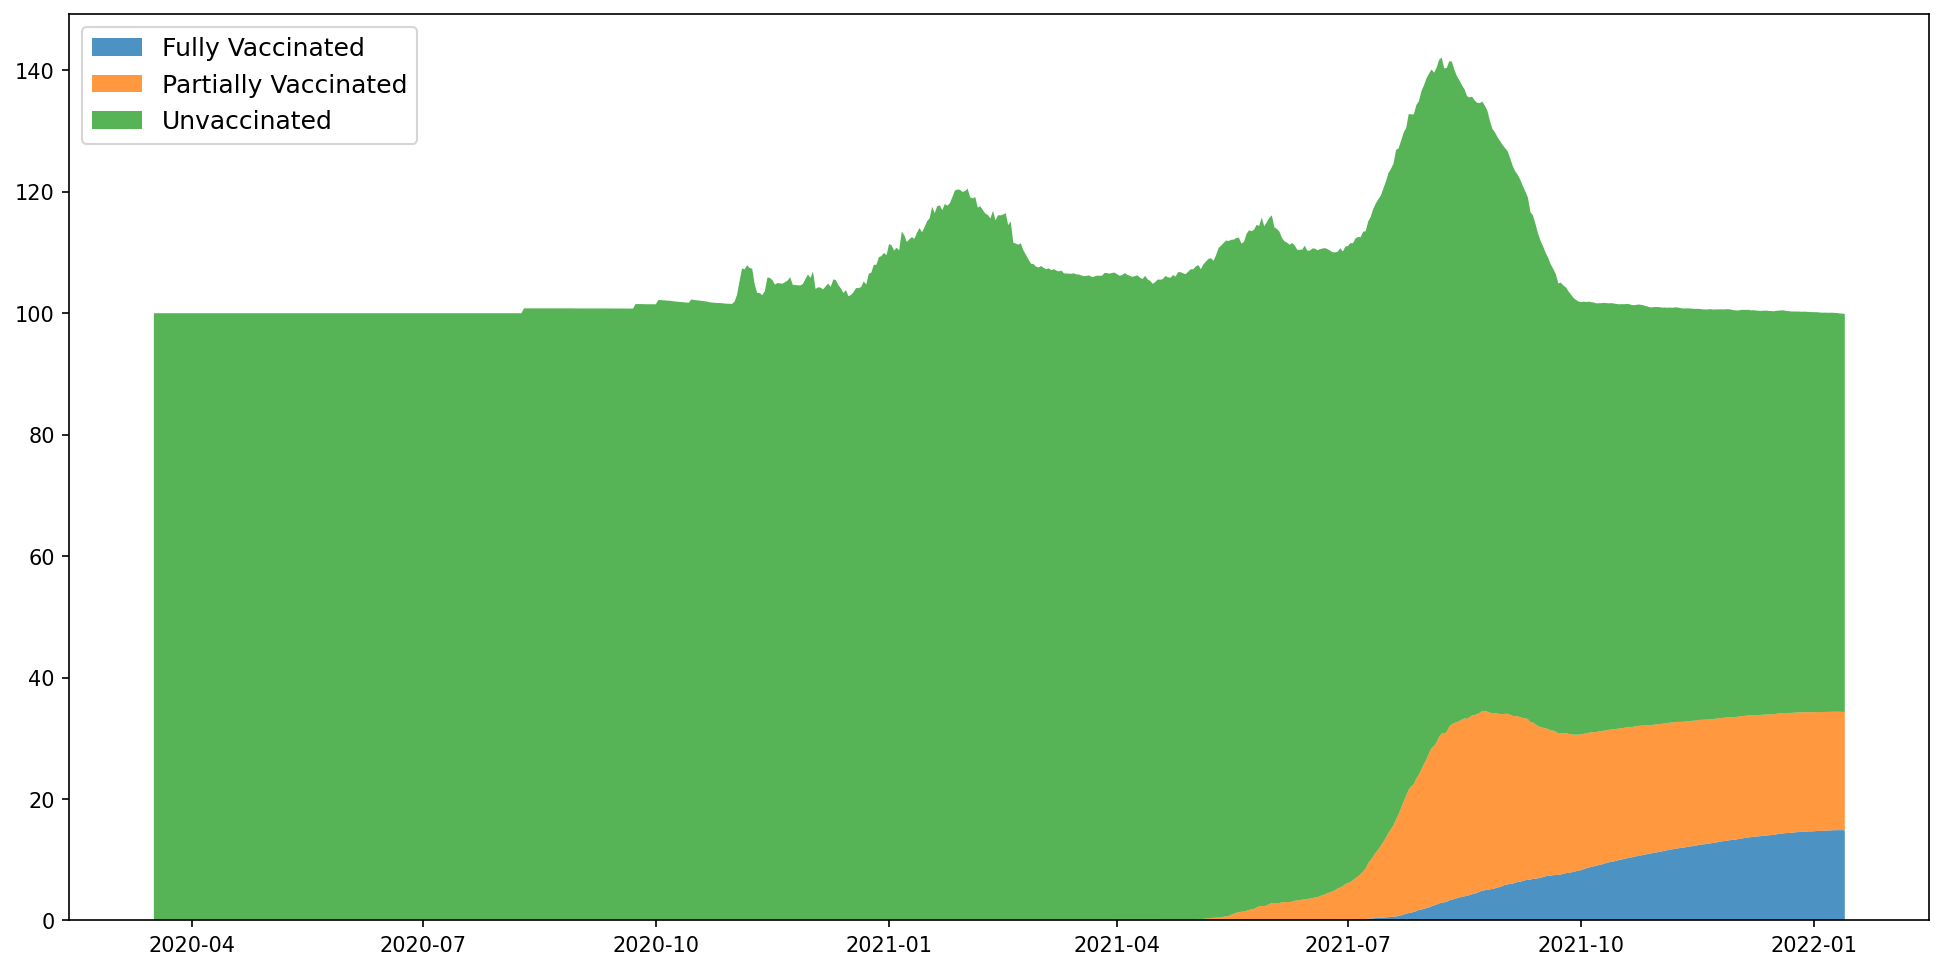

In [15]:
#Finding the proportion of vaccinated people vs unvaccinated people who have died due to Covid

cumsumtot = np.cumsum(totaldeath['deaths_new'])
cumsumfvax = np.cumsum(totaldeath['deaths_fvax'])
cumsumpvax = np.cumsum(totaldeath['deaths_pvax'])
cumsumunvax = np.cumsum(totaldeath['deaths_unvax'])

totaldeath['cumsumtot'] = np.cumsum(totaldeath['deaths_new'])
totaldeath ['deathfvaxrate'] = cumsumfvax/cumsumtot *100
totaldeath ['deathpvaxrate'] = cumsumpvax/cumsumtot *100
totaldeath ['deathunvaxrate'] = cumsumunvax/cumsumtot *100

plt.figure(figsize=(16, 8), dpi=150)
plt.stackplot(totaldeath.index,
              [totaldeath['deathfvaxrate'], totaldeath['deathpvaxrate'],
               totaldeath['deathunvaxrate']],
              labels=['Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated'],
              alpha=0.8)

plt.legend(loc=2, fontsize='large')
plt.show()